![](https://cdn-images-1.medium.com/max/1000/1*VZNekSiJoJCcYACvIseF9Q.png)


In [1]:
from IPython.display import HTML
import time

handle = display(HTML("""<marquee>👌</marquee>"""), display_id='html_marquee1')
time.sleep(2)
handle = display(HTML("""<marquee>Note: Due to memory limitations, data separation and regression calculations were done in five notebooks.</marquee>"""), display_id='html_marquee1', update=True)

## <div style="color:lightgray;background-color:navy;padding:1.2%;border-radius:12px 12px;font-size:1em;text-align:center">[5]⚕️Competition Submission⚕️AutoGluon</div>

## <div style="color:yellow;display:inline-block;border-radius:5px;background-color:lightgray;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:navy;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>Description</p></div>

- The examples in the competition dataset are represented by a binary classification of whether a given small molecule is a binder or not to one of three protein targets.

- Three protein targets were screened for this competition :

>
> **EPHX2 (sEH)**
>
> The first target, epoxide hydrolase 2, is encoded by the EPHX2 genetic locus, and its protein product is commonly named “soluble epoxide hydrolase”, or abbreviated to sEH.
>
> **BRD4**
>
> The second target, bromodomain 4, is encoded by the BRD4 locus and its protein product is also named BRD4. 
>
> **ALB (HSA)**
>
> The third target, serum albumin, is encoded by the ALB locus and its protein product is also named ALB. 
>

- The specifications of the columns of the train file and the test file are as follows :

| Number | Features | Description |
| ----------- | ----------- | ----------- |
| 1 | **<span style="color: green;">'id'** | A unique example_id that we use to identify the molecule-binding target pair. |  
| 2 | **<span style="color: green;">'buildingblock1_smiles'** | The structure, in SMILES, of the first building block | 
| 3 | **<span style="color: green;">'buildingblock2_smiles'** | The structure, in SMILES, of the second building block |  
| 4 | **<span style="color: green;">'buildingblock3_smiles'** | The structure, in SMILES, of the third building block |  
| 5 | **<span style="color: green;">'molecule_smiles'** | The structure of the fully assembled molecule, in SMILES. This includes the three building blocks and the triazine core. - Note we use a [Dy] as the stand-in for the DNA linker. |  
| 6 | **<span style="color: green;">'protein_name'** | The protein target name | 
| 7 | **<span style="color: green;">'binds'** | The target column. A binary class label of whether the molecule binds to the protein. Not available for the test set. |  
 

## <div style="color:yellow;display:inline-block;border-radius:5px;background-color:lightgray;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:navy;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>Details about the experiments</p></div>

- DELs are libraries of small molecules with unique DNA barcodes covalently attached

- DELs are manufactured by combining different building blocks

![](https://cdn-images-1.medium.com/max/1000/1*4Fu8NvfopCK-1XN6p7FeUw.png)

## <div style="color:yellow;display:inline-block;border-radius:5px;background-color:lightgray;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:navy;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>Insight :</p></div>

>
> The **testing data** has 1674896 rows. A large number of rows slows down the work and practically limits the use of a variety of solutions. Perhaps it would have been better if the evaluation in this competition was done with fewer samples.
>
> In the first notebook, we randomly separated 2,000,000 rows of **training data** by protein type. Of course, in the second, third and fourth notebooks, we used only a part of the rows to model and predict each protein. Finally, the fifth notebook is for posting challenge results.
>
> So if the first notebook is run several times and each time the regression calculations are done in subsequent notebooks, all these results can be used as **cross-validation**.
>
> In addition to the output of first notebook, you can also use the public dataset **"BELKA_frag_1"** at the following address :
>
> https://www.kaggle.com/datasets/mehrankazeminia/belka-frag-1
>
## <div style="color:yellow;display:inline-block;border-radius:5px;background-color:lightgray;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:navy;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>Notebooks :</p></div>

| Number | Notebooks |
| ----------- | ----------- |
| 1 | **<span style="color: red;"> ⚕️EDA & Data separation based on protein type** |
| 2 | **<span style="color: navy;">⚕️Create Models & Prediction for protein_name= sEH** |
| 3 | **<span style="color: red;"> ⚕️Create Models & Prediction for protein_name= BRD4** |
| 4 | **<span style="color: navy;">⚕️Create Models & Prediction for protein_name= HSA** |
| 5 | **<span style="color: navy;">⚕️Competition Submission** |


<p style="border-bottom: 10px solid navy"></p>

<p style="border-bottom: 10px solid navy"></p>

In [2]:
import os
import gc
import glob
import random
import numpy as np 
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy import stats
from pathlib import Path
from itertools import groupby
# ..................................
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline

In [3]:
!ls ../input/*

../input/2-belka-seh-autogluon-frag1:
__notebook__.ipynb  __results__.html  pred1.csv
__output__.json     custom.css	      predictor

../input/3-belka-brd4-autogluon-frag1:
__notebook__.ipynb  __results__.html  pred2.csv
__output__.json     custom.css	      predictor

../input/4-belka-hsa-autogluon-frag1:
__notebook__.ipynb  __results__.html  pred3.csv
__output__.json     custom.css	      predictor

../input/5-belka-submission-autogluon-frag2:
__notebook__.ipynb  __results__.html   custom.css      submission.csv
__output__.json     __results___files  sub_auto_1.csv

../input/5-belka-submission-autogluon-frag3:
__notebook__.ipynb  __results__.html   custom.css      submission.csv
__output__.json     __results___files  sub_auto_1.csv

../input/leash-BELKA:
sample_submission.csv  test.csv  test.parquet  train.csv  train.parquet

../input/leashbio-xgb-ecfp-10m-sample-rows:
__notebook__.ipynb  __results__.html  submission.csv
__output__.json     custom.css

../input/p-6-6-belka-competition-

# <span style="color:darkcyan;">Competition Submission</span>

<p style="border-bottom: 10px solid darkcyan"></p>

In [4]:
# protein_name ='sEH'
pred1 = pd.read_csv('/kaggle/input/2-belka-seh-autogluon-frag1/pred1.csv')

pred1.shape

(558142, 2)

In [5]:
# protein_name ='BRD4'
pred2 = pd.read_csv('/kaggle/input/3-belka-brd4-autogluon-frag1/pred2.csv')

pred2.shape

(558859, 2)

In [6]:
# protein_name ='HSA'
pred3 = pd.read_csv('/kaggle/input/4-belka-hsa-autogluon-frag1/pred3.csv')

pred3.shape                              

(557895, 2)

In [7]:
pred = pd.concat([pred1, pred2, pred3])
pred['binds'] = np.clip(pred['binds'], 0., 1.)
pred

,id,binds
0,295246832,0.001097
1,295246835,0.000829
2,295246838,0.001355
3,295246841,0.000383
4,295246844,0.031202
...,...,...
557890,296921712,0.176676
557891,296921715,0.470288
557892,296921718,0.049599
557893,296921721,0.023657


(0.0, 1.0)

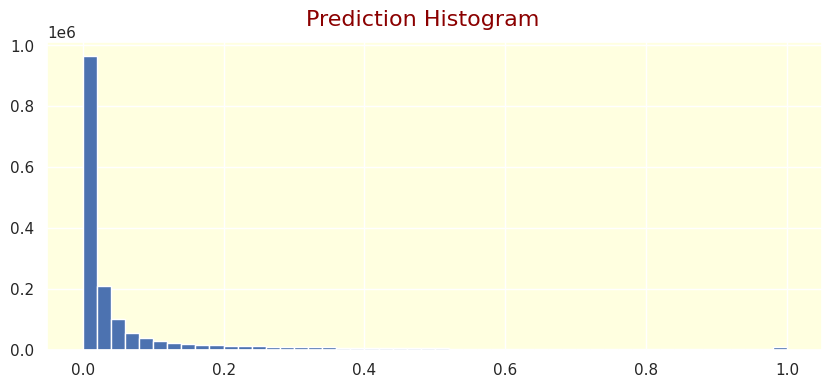

In [8]:
sns.set()
plt.figure(figsize=(10, 4))
plt.hist(pred['binds'], bins=50)

plt.gca().set_facecolor('lightyellow')
plt.suptitle('Prediction Histogram', y=0.96, fontsize=16, c='darkred')

round(pred['binds'].min(), 3), round(pred['binds'].max(), 3)

In [9]:
sub_auto_1 = pred.sort_values(by=['id'])
sub_auto_1.to_csv('sub_auto_1.csv', index=False)

# Public Score: 0.499
!ls

__notebook__.ipynb  sub_auto_1.csv


In [10]:
# Training is done with different rows of training data.

sub_auto_2 = pd.read_csv('../input/5-belka-submission-autogluon-frag2/sub_auto_1.csv')
sub_auto_3 = pd.read_csv('../input/5-belka-submission-autogluon-frag3/sub_auto_1.csv')

# Similar to cross validation

sub_auto = pd.read_csv('../input/leash-BELKA/sample_submission.csv')
sub_auto['binds'] = (sub_auto_1['binds'].values + sub_auto_2['binds'].values + sub_auto_3['binds'].values) / 3
sub_auto.to_csv('sub_auto.csv', index=False)
# Public Score: 0.524
!ls

__notebook__.ipynb  sub_auto.csv  sub_auto_1.csv


# <span style="color:darkcyan;">Ensembling</span>

<p style="border-bottom: 10px solid darkcyan"></p>

In [11]:
#Thanks to: @ricopue - Public Score: 0.546
sub_xgb = pd.read_csv('../input/leashbio-xgb-ecfp-10m-sample-rows/submission.csv')

sub_lgbm = pd.read_csv('../input/p-6-6-belka-competition-submission-lgbm/submission.csv')

submission = pd.read_csv('../input/leash-BELKA/sample_submission.csv')
submission['binds'] = (sub_auto['binds'].values* 0.35) + (sub_lgbm['binds'].values* 0.15) + (sub_xgb['binds'].values* 0.50)
submission.to_csv('submission.csv', index=False)
#Public Score: 0.553
!ls

__notebook__.ipynb  sub_auto.csv  sub_auto_1.csv  submission.csv


(0.0, 1.0)

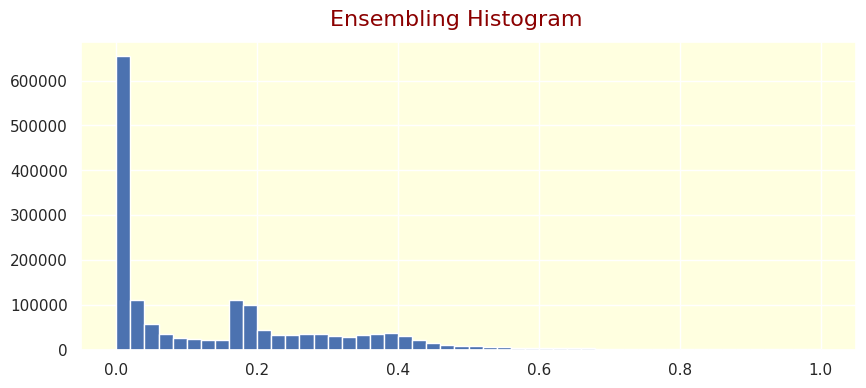

In [12]:
sns.set()
plt.figure(figsize=(10, 4))
plt.hist(submission['binds'], bins=50)

plt.gca().set_facecolor('lightyellow')
plt.suptitle('Ensembling Histogram', y=0.96, fontsize=16, c='darkred')

round(submission['binds'].min(), 3), round(submission['binds'].max(), 3)

<p style="border-bottom: 10px solid darkcyan"></p>
<p style="border-bottom: 10px solid darkcyan"></p>